In [217]:
import pandas 
import mplfinance
from indicators import LogRtn


In [218]:
import matplotlib.pyplot as plt

In [219]:
import plotly

In [220]:
PNL_FILE='/home/jcarter/sandbox/trading/strats/bert/pnl_series.csv'

In [221]:
df = pandas.read_csv(PNL_FILE)

In [222]:
# helper function that puts the dataframe in a scrollview window!
def table(df):
    import plotly.graph_objs as go
    nf = df.reset_index()
    fig = go.Figure(data=[go.Table(
    header=dict(values=list(nf.columns),
                align='left'),
    cells=dict(values=[nf[i] for i in nf.columns],           
                align='left'))
    ])
    return fig

In [223]:
table(df)

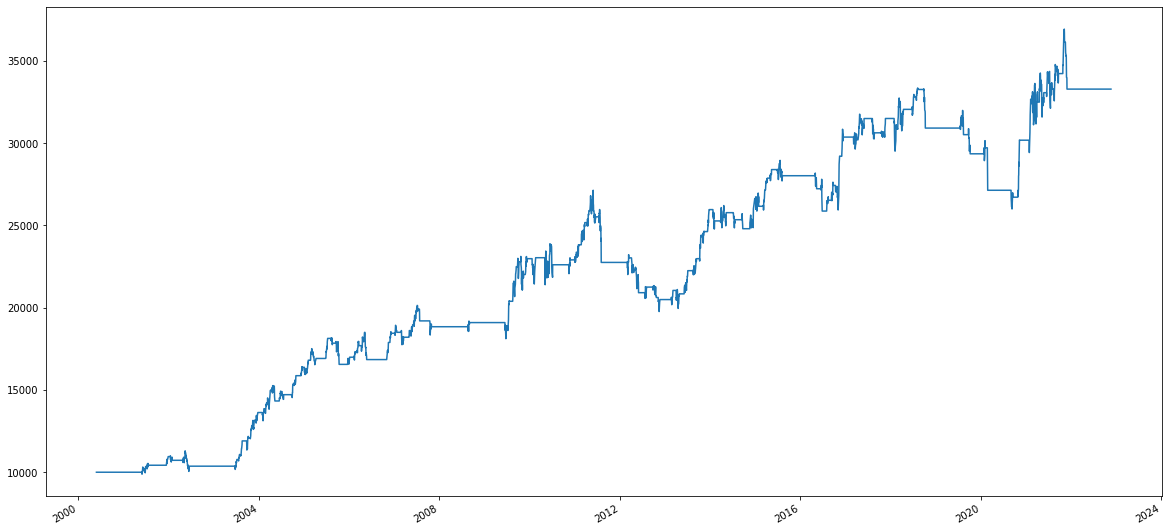

In [224]:
gg = df[['Date','Equity']].copy()
#gg = df.copy()
gg['Date'] = pandas.to_datetime(gg['Date'])
gg.set_index('Date',inplace=True)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

#gg.head()
plt.plot(gg)
plt.gcf().autofmt_xdate()
plt.show()

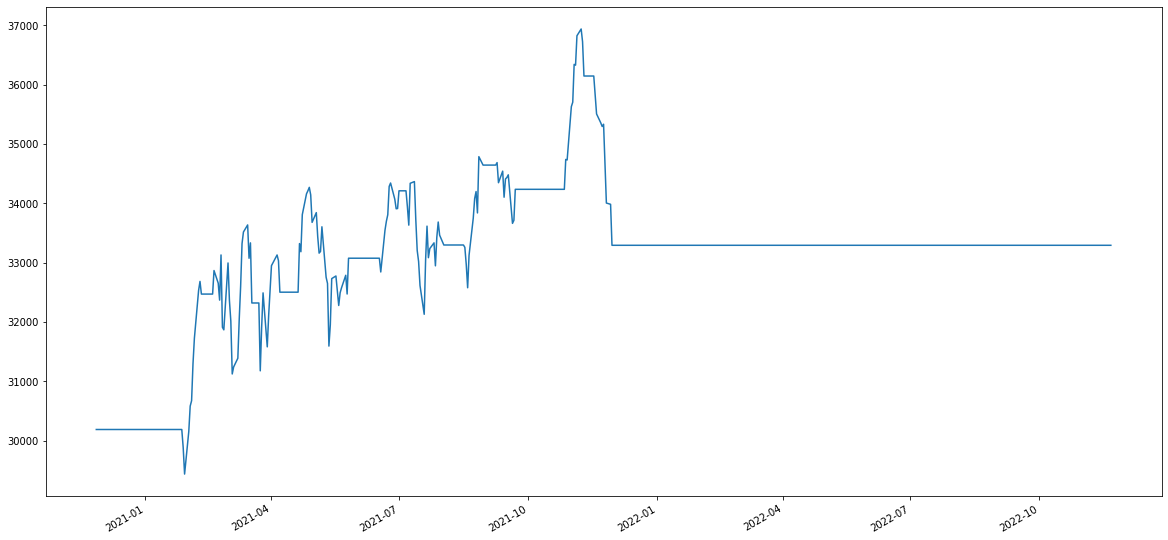

In [225]:

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

plt.plot(gg[-500:])
plt.gcf().autofmt_xdate()
plt.show()

In [226]:
mm = pandas.read_csv(PNL_FILE)
table(mm)

In [227]:
def add_pnl_rtn(df):
    rf = df.copy()
    rf['pnl_log_rtn'] = None
    logrtn = LogRtn(50)
    for i in range(df.shape[0]):
        index = df.index[i]
        pnl = df.iloc[i]['Equity']
        rf.at[index, 'pnl_log_rtn'] = logrtn.push(pnl)
        
    return rf

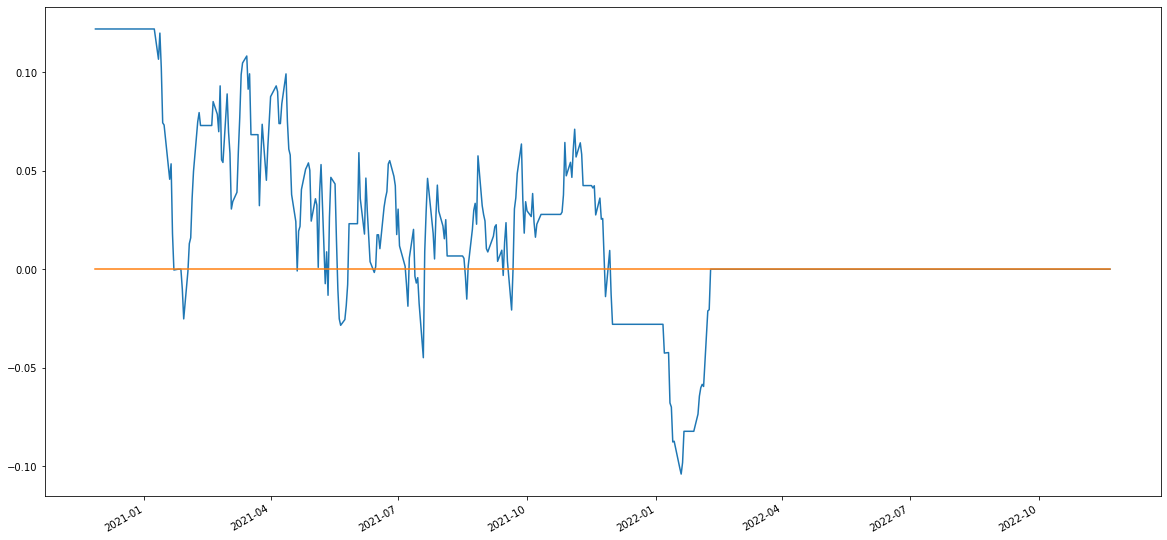

In [228]:
gg = add_pnl_rtn(gg)
gg = gg[-500:].copy()
gg = gg[['pnl_log_rtn']]
zero_line = gg.copy()
zero_line['pnl_log_rtn'] = 0

#gg.head(20)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

plt.plot(gg)
plt.plot(zero_line)
plt.gcf().autofmt_xdate()
plt.show()

